# Implementación de algoritmos de Optmización: algoritmos gradiente descendiente y de Newton
### José Crispín Alvarado Calderón

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad, hessian

In [2]:
# The Rosenbrock function with global minimum at (1,1)
def f(x, y):
    return 100*(y - x**2)**2 + (1-x)**2
#def f(x, y):
#    return 5*np.cos(x-2)-5*np.sin(x-2*y)

def g(x_1, x_2):
    y = x_1**2 + x_2**2
    return y

def h(x_1, x_2):
    y = x_1**2 - x_2**2
    return y

def contour_plot(func, xmin, xmax, ymin, ymax, num):
    xlist_1 = np.linspace(xmin, xmax, num)
    xlist_2 = np.linspace(ymin, ymax, num)
    X_1, X_2 = np.meshgrid(xlist_1, xlist_2)
    Z = func(X_1,X_2)

    fig, ax = plt.subplots(1, 1) 
    # plots contour lines 
    ax.contourf(X_1, X_2, Z)
    ax.set_title('Contour plot')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')### Gradiente descendiente para la función $f(x_1,x_2) = x_1^2+x_2^2$
    #ax.scatter(1,1, c='white')
    #plt.show()
    return fig, ax
    

# Algoritmo gradiente descendiente

In [3]:
# Gradient descent algorithm

def gradient_descent(func, x_i, max_it, threshold, alpha = 0.05):
    ''' func: Objective function
        grad_func: gradient of objective function
        x_i: initial point
        alpha: Step length'''
    xk = x_i
    x_last = xk
    fk = func(*xk)
    i = 0
    diff = 1.0e10
    
    x_hist = []
    f_hist = []
    x_hist.append(np.array(xk))
    f_hist.append(fk)
    
    gradf = grad(func,(0,1))
    
    while i < max_it and np.linalg.norm(diff) > threshold :
        #xk = xk - alpha*np.array([dg_x(xk), dg_y(xk)])
        xk = xk - alpha*np.array(gradf(*xk))
        fk = func(*xk)
        x_hist.append(xk)
        f_hist.append(fk)
        
        diff = np.absolute(f_hist[-1]-f_hist[-2])
        i+=1
        
    return x_hist, f_hist


def add_points(fig, ax, x):
    """Adds the given points to
    the given plot"""
    for i in range(len(x)-1):
        ax.scatter(*x[i], c='yellow', s=8)
    plt.show()
    

### Gradiente descendiente para la función $f(x_1,x_2) = x_1^2+x_2^2$

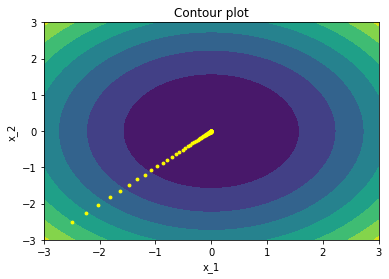

x= [-0.0014098 -0.0014098] f(x)= 3.975084393146578e-06
Resultado obtenido con el algoritmo de gradiente descendiente
Punto inicial: (-2.5, -2.5)
Número de iteraciones: 200
Step length: 0.05


In [4]:
xg = (-2.5, -2.5); it_g = 200; tol_g = 1.0e-6; alpha_g = 0.05;
X_hist, F_hist = gradient_descent(g, xg, it_g, tol_g, alpha_g)
fig_g, ax_g = contour_plot(g,-3,3,-3,3,100)
add_points(fig_g, ax_g, X_hist)
print('x=',X_hist[-1], 'f(x)=', F_hist[-1])
print('Resultado obtenido con el algoritmo de gradiente descendiente')
print('Punto inicial:', xg)
print('Número de iteraciones:', it_g)
print('Step length:', alpha_g)

### Gradiente descendiente para la función de Rosenbrock $ f(x_1,x_2)=100(x_2-x_1^2)^2+(1-x_1)^2$ con mínimo en $x=(1,1)$

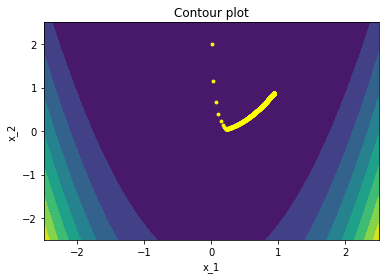

x= [0.9410602  0.88534996] f(x)= 0.0034798702374514994
Resultado obtenido con gradiente descendiente
Punto inicial: (0.01, 2.0)
Número de iteraciones: 2000
Step length: 0.0021


In [5]:
xf = (0.01, 2.0); it_f = 2000; tol = 1.0e-6; alpha_f = 0.0021
X_hist_f, F_hist_f = gradient_descent(f, xf, it_f, tol, alpha_f)
fig_f, ax_f = contour_plot(f,-2.5,2.5,-2.5,2.5,200)
add_points(fig_f, ax_f, X_hist_f)
print('x=', X_hist_f[-1], 'f(x)=', F_hist_f[-1])
print('Resultado obtenido con gradiente descendiente')
print('Punto inicial:', xf)
print('Número de iteraciones:', it_f)
print('Step length:', alpha_f)

# Algoritmo de Newton

In [6]:
def Newton_algorithm(func, x_i, max_it, threshold, alpha = 0.05):
    ''' func: Objective function
        grad_func: gradient of objective function
        x_i: initial point
        alpha: Step length'''
    xk = x_i
    x_last = xk
    fk = func(*xk)
    i = 0
    diff = 1.0e10
    
    x_hist = []
    f_hist = []
    x_hist.append(np.array(xk))
    f_hist.append(fk)
    
    gradf = grad(func,(0,1))
    #hess = hessian(func,0)
    #print(hess(*np.array(xk)))
    h00 = grad(grad(func,0),0)
    h01 = grad(grad(func,1),0)
    h10 = grad(grad(func,0),1)
    h11 = grad(grad(func,1),1)

    while i < max_it and np.linalg.norm(diff) > threshold :
        hess = np.array([[h00(*xk), h01(*xk)],[h10(*xk), h11(*xk)]])
        xk = xk - alpha*np.dot(np.linalg.inv(hess),np.array(gradf(*xk)))
        fk = func(*xk)
        x_hist.append(xk)
        f_hist.append(fk)
        
        diff = np.absolute(f_hist[-1]-f_hist[-2])
        i+=1
        
    return x_hist, f_hist




### Algoritmo de Newton para la función $f(x_1,x_2) = x_1^2+x_2^2$

/opt/anaconda3/lib/python3.8/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


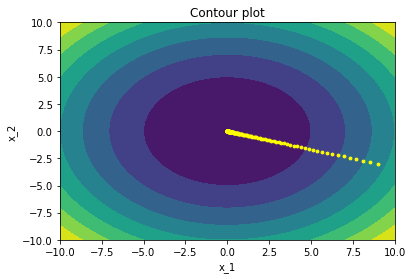

x= [ 0.00286318 -0.00095439] f(x)= 9.108661651030702e-06
Resultado obtenido con el algoritmo de Newton
Punto inicial: (9.0, -3.0)
Número de iteraciones: 200
Step length: 0.05


In [7]:
xg = (9.0, -3.0); it_g = 200; tol = 1.0e-6; alpha_g = 0.05
X_hist_gN, F_hist_gN = Newton_algorithm(g, xg, it_g, tol, alpha_g)
fig_gN, ax_gN = contour_plot(g,-10,10,-10,10,200)
add_points(fig_gN, ax_gN, X_hist_gN)
print('x=', X_hist_gN[-1], 'f(x)=', F_hist_gN[-1])
print('Resultado obtenido con el algoritmo de Newton')
print('Punto inicial:', xg)
print('Número de iteraciones:', it_g)
print('Step length:', alpha_g)

### Algoritmo de Newton para la función de Rosenbrock $ f(x_1,x_2)=100(x_2-x_1^2)^2+(1-x_1)^2$ con mínimo en $x=(1,1)$

### Algoritmo de Newton para la función $f(x_1,x_2) = x_1^2+x_2^2$

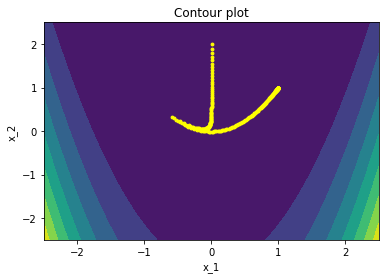

x= [0.99708857 0.99414611] f(x)= 8.632481746522988e-06
Resultado obtenido con el algoritmo de Newton
Punto inicial: (0.01, 2.0)
Número de iteraciones: 300
Step length: 0.05


In [8]:
xf = (0.01, 2.0); it_f = 300; tol = 1.0e-6; alpha_f = 0.05
X_hist_f, F_hist_f = Newton_algorithm(f, xf, it_f, tol, alpha_f)
fig_f, ax_f = contour_plot(f,-2.5,2.5,-2.5,2.5,200)
add_points(fig_f, ax_f, X_hist_f)
print('x=', X_hist_f[-1], 'f(x)=', F_hist_f[-1])
print('Resultado obtenido con el algoritmo de Newton')
print('Punto inicial:', xf)
print('Número de iteraciones:', it_f)
print('Step length:', alpha_f)

### Algoritmo de Newton para la función $f(x_1,x_2) = x_1^2-x_2^2$

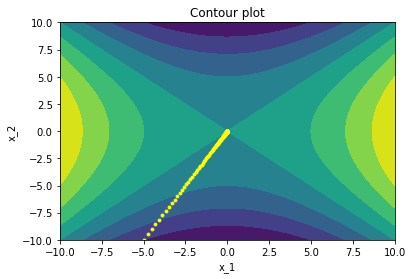

x= [-0.00167437 -0.00334875] f(x)= -8.410583241948948e-06
Resultado obtenido con el algoritmo de Newton
Punto inicial: (-5.0, -10.0)
Número de iteraciones: 300
Step length: 0.05


In [10]:
xh = (-5.0, -10.0); it_h = 300; tol = 1.0e-6; alpha_h = 0.05
X_hist_h, F_hist_h = Newton_algorithm(h, xh, it_h, tol, alpha_h)
fig_h, ax_h = contour_plot(h,-10.0,10.0,-10.0,10.0,200)
add_points(fig_h, ax_h, X_hist_h)
print('x=', X_hist_h[-1], 'f(x)=', F_hist_h[-1])
print('Resultado obtenido con el algoritmo de Newton')
print('Punto inicial:', xh)
print('Número de iteraciones:', it_h)
print('Step length:', alpha_h)